## Practical Project: Used cars datasets

### Business logic/understanding


The project consists of an original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing. The goal is to understand what factors make a car more or less expensive. As a result of our analysis,  provides clear recommendations to clients or a used car dealership or as to what consumers value in a used car.

To frame the task, throughout these practical applications we will refer back to a standard process in industry for data projects called CRISP-DM. This process provides a framework for working through a data problem. 

### import all necessary libraries

In [60]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV

In [61]:
#Load Data
df = pd.read_csv('data/vehicles.csv')

### Data Exploration


In [62]:
#view top 5 rows of the datasets
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


### Data Pre-processing


In [63]:
#retrieve details on the data fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [64]:
df_cleaned = df.dropna()
df_cleaned.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al


### Data visualization


Text(0.5, 1.0, 'Vechicle Prices and identification numbers')

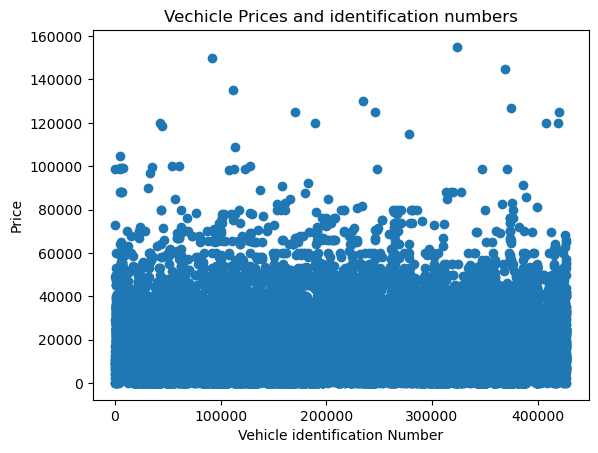

In [65]:
# Visualize the data distribution using scatter plot
plt.scatter(df_cleaned.index,df_cleaned['price'] )
plt.xlabel('Vehicle identification Number') 
plt.ylabel('Price')  
plt.title('Vechicle Prices and identification numbers') 

Text(0.5, 1.0, 'Histogram showing Vehicle Prices')

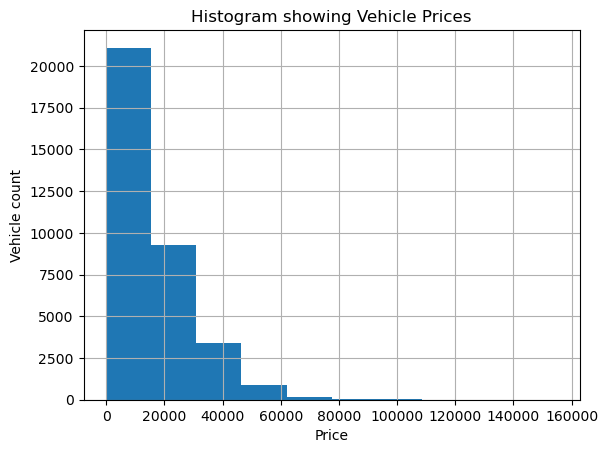

In [66]:
#Further data visualization
df_cleaned['price'].hist()
plt.xlabel('Price')  
plt.ylabel('Vehicle count') 
plt.title('Histogram showing Vehicle Prices')  

In [67]:
# drop missiong values and set select a subset of columns or features) - lets work with 1000 records
df_data= df.dropna(subset=['price', 'year', 'odometer', 'manufacturer'])
df_data = df_data[['price', 'year', 'odometer', 'manufacturer']]
df_data = df_data[:1000]
df_data.head()

,price,year,odometer,manufacturer
27,33590,2014.0,57923.0,gmc
28,22590,2010.0,71229.0,chevrolet
29,39590,2020.0,19160.0,chevrolet
30,30990,2017.0,41124.0,toyota
31,15000,2013.0,128000.0,ford


In [68]:
#use the LabelEncoder to convert all string features to numericals
encoder = LabelEncoder()
df_data = df_data.apply(encoder.fit_transform)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 27 to 1107
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   price         1000 non-null   int64
 1   year          1000 non-null   int64
 2   odometer      1000 non-null   int64
 3   manufacturer  1000 non-null   int32
dtypes: int32(1), int64(3)
memory usage: 35.2 KB


### Modeling


In [69]:
# Select the target (y) Target variable (price) and features (X) -  Independent variables
X = df_data[['price', 'year', 'odometer', 'manufacturer']]  
y = df_data['price']  

In [70]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Build and train the multiple regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
#Make predictions on the test set
y_pred = model.predict(X_test)



### Model Evaluation


In [73]:
#Mean Squared Error (MSE) and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
intercept = model.intercept_


In [74]:
# Output the results
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')



Mean Squared Error: 4.864783110770191e-28
R^2 Score: 1.0


In [75]:
# Get the model coefficients to understand the impact of each feature
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
print(intercept)

               Coefficient
price         1.000000e+00
year          8.753315e-18
odometer     -9.334218e-17
manufacturer  3.684799e-17
2.842170943040401e-14


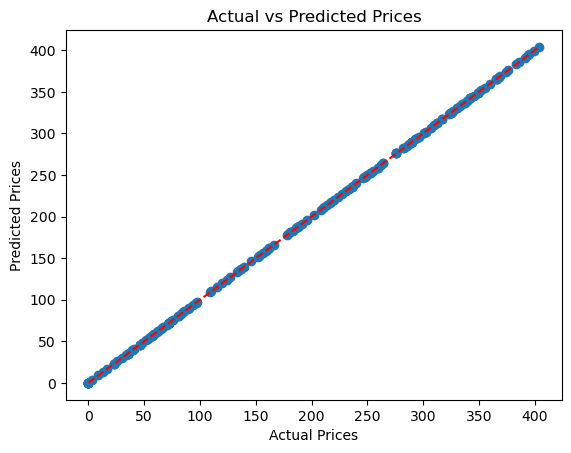

In [76]:
# Plot the actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [77]:
# Calculate the correlation matrix
correlation_matrix = df_data.corr()

# Display the correlation of independent variables with the target variable (e.g., 'price')
target_variable = 'price'  # Adjust this to the name of your target variable
correlation_with_target = correlation_matrix[target_variable].sort_values(ascending=False)

# Print the correlation with target variable
print("Correlation of features with target variable:")
print(correlation_with_target)

# Ddisplay the correlation between independent variables to check for multicollinearity
print("\nCorrelation among independent variables:")
print(correlation_matrix.drop(target_variable, axis=1))

Correlation of features with target variable:
price           1.000000
year            0.474939
manufacturer   -0.012534
odometer       -0.614997
Name: price, dtype: float64

Correlation among independent variables:
                  year  odometer  manufacturer
price         0.474939 -0.614997     -0.012534
year          1.000000 -0.469198      0.070763
odometer     -0.469198  1.000000     -0.011783
manufacturer  0.070763 -0.011783      1.000000


### Findings


Using the correlation index, the 'year' correlates positively with our target variable (price), as indicated by the value (0.474939). Therefore, the year of the vehicle is crucial in determining its final price. Our findings are in line with real-world observations, where it is clear that newly manufactured cars cost significantly more than older vehicles.